In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from main import load_dataset
import os 
class opt_config:
    def __init__(self):
        self.dataset = "mitstates_vn"
        self.dataset_path = "../data/MITStates/release_dataset" 
        self.model = "tirg" 
        self.loss = "soft_triplet" 
        self.comment = "css3d_tirg"
        self.embed_dim = 512
        self.learning_rate = 1e-2
        self.weight_decay = 1e-6 
        self.f = ""
        self.learning_rate_decay_frequency = 99999999
        self.batch_size = 32
        self.num_epochs = 100
        self.n_epochs_valudations = 5
        self.loader_num_workers = 4
        self.pretrained_weights = None
        
opt = opt_config()

trainset, testset = load_dataset(opt)

Reading dataset  mitstates_vn
82732 test queries
trainset size: 43207
testset size: 10546


In [4]:
trainset.generate_random_query_target()


NotImplementedError: 

In [7]:
path = opt.dataset_path

nouns = set()
adjs = set()

for f in os.listdir(path + '/images'):
    if ' ' not in f:
        continue
    adj, noun = f.split()
    nouns.add(noun)
    adjs.add(adj)

In [35]:
len(nouns)

245

In [18]:
adjs

{'adj',
 'ancient',
 'barren',
 'bent',
 'blunt',
 'bright',
 'broken',
 'browned',
 'brushed',
 'burnt',
 'caramelized',
 'chipped',
 'clean',
 'clear',
 'closed',
 'cloudy',
 'cluttered',
 'coiled',
 'cooked',
 'cored',
 'cracked',
 'creased',
 'crinkled',
 'crumpled',
 'crushed',
 'curved',
 'cut',
 'damp',
 'dark',
 'deflated',
 'dented',
 'diced',
 'dirty',
 'draped',
 'dry',
 'dull',
 'empty',
 'engraved',
 'eroded',
 'fallen',
 'filled',
 'foggy',
 'folded',
 'frayed',
 'fresh',
 'frozen',
 'full',
 'grimy',
 'heavy',
 'huge',
 'inflated',
 'large',
 'lightweight',
 'loose',
 'mashed',
 'melted',
 'modern',
 'moldy',
 'molten',
 'mossy',
 'muddy',
 'murky',
 'narrow',
 'new',
 'old',
 'open',
 'painted',
 'peeled',
 'pierced',
 'pressed',
 'pureed',
 'raw',
 'ripe',
 'ripped',
 'rough',
 'ruffled',
 'runny',
 'rusty',
 'scratched',
 'sharp',
 'shattered',
 'shiny',
 'short',
 'sliced',
 'small',
 'smooth',
 'spilled',
 'splintered',
 'squished',
 'standing',
 'steaming',
 'strai

In [26]:
for adj in adjs:
    if adj not in vocab_dict.keys():
        print(adj)

brushed
adj


In [28]:
vocab_dict = {
    "ancient":"cổ xưa",
    "barren":"cằn cỗi",
    "bent":"cong vẹo",
    "blunt":"cùn",
    "bright":"sáng sủa",
    "broken":"hư hỏng",
    "browned": "chiên vàng",
    "brushed": "chải chuốt",
    "burnt": "thiêu đốt",
    "caramelized":"caramen hóa",
    "chipped":"sứt mẻ",
    "clean":"sạch sẽ",
    "clear":"thông thoáng",
    "closed":"đóng lại",
    "cloudy":"nhiều mây",
    "cluttered":"lộn xộn",
    "coiled":"uốn khúc",
    "cooked":"nấu chín",
    "cored":"bỏ hạt",
    "cracked":"nứt nẻ",
    "creased": "nhàu nát",
    "crinkled": "nhàu nát",
    "crumpled": "nhàu nát",
    "crushed": "nghiền nát",
    "curved": "uốn cong",
    'cut': "cắt",
    'damp': "ẩm ướt",
    'dark': "tối",
    'deflated': "xẹp xuống",
    'dented': "móp",
    'diced': "cắt vuông",
    'dirty': "dơ bẩn",
    'draped': "phủ lên",
    'dry': "khô",
    'dull': "ảm đạm",
    'empty': "trống vắng",
    'engraved': "điêu khắc",
    'eroded': "xói mòn",
    'fallen': "rơi",
    'filled': "rót đầy",
    'foggy': "sương mù",
    'folded': "gấp lại",
    'frayed': "sờn rách",
    'fresh': "tươi mới",
    'frozen': "đông lạnh",
    'full': "lấp đầy",
    'grimy': "dơ bẩn",
    'heavy': "nặng nề",
    'huge': "to lớn",
    'inflated': "thổi phồng",
    'large': "to lớn",
    'lightweight': "nhẹ nhàng",
    'loose': "lỏng lẻo",
    'mashed': "nghiền nát",
    'melted': "tan chảy",
    'modern': "hiện đại",
    'moldy': "mốc meo",
    'molten': "nấu chảy",
    'mossy': "rêu phong",
    'muddy': "bùn lầy",
    'murky': "âm u",
    'narrow': "chất hẹp",
    'new': "mới mẻ",
    'old': "cũ kĩ",
    'open': "mở",
    'painted': "sơn màu",
    'peeled': "bóc vỏ",
    'pierced': "xỏ lỗ",
    'pressed': "ép lại",
    'pureed': "xảy nguyễn",
    'raw': "còn sống",
    'ripe': "chín muồi",
    'ripped': "xé",
    'rough': "sần sùi",
    'ruffled': "nhăn nhúm",
    'runny': "chảy nước",
    'rusty': "gì sét",
    'scratched': "trầy",
    'sharp': "sắt nhọn",
    'shattered': "bể tan",
    'shiny': "sáng bóng",
    'short': "thấp ngắn",
    'sliced': "cắt lát",
    'small': "nhỏ bé",
    'smooth': "mượt mà",
    'spilled': "chảy nước",
    'splintered': "mảnh vụn",
    'squished': "nhăn nheo",
    'standing': "đứng thẳng",
    'steaming': "hấp hơi",
    'straight': "thẳng",
    'sunny': "ánh nắng",
    'tall': "cao",
    'thawed': "rã đông",
    'thick': "dày",
    'thin': "mỏng",
    'tight': "bó sát",
    'tiny': "nhỏ bé",
    'toppled': "làm ngã",
    'torn':"rách nát",
    'unpainted': "chưa sơn màu",
    'unripe': "chưa chín",
    'upright': "thẳng đứng",
    'verdant': "xanh tươi",
    'viscous': "nhầy nhớt",
    'weathered': "phong hóa",
    'wet': "ẩm ướt",
    'whipped': "",
    'wide': "rộng",
    'wilted': "héo tàn",
    'windblown': "gió thổi",
    'winding': "quanh co",
    'worn': "hao mòn",
    'wrinkled': "nếp nhăn",
    'young': "trẻ trung"
}

In [29]:
len(vocab_dict)

115

In [6]:
from torch_functions import UnNormalize
from matplotlib import pyplot as plt
import numpy as np

xảy_nguyễn


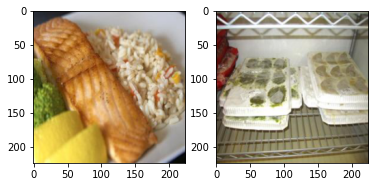

In [7]:
rand = np.random.randint(10000)
item = trainset.__getitem__(rand)
unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

source_img_data = unorm(item["source_img_data"]).detach().numpy()
source_img_data = np.einsum("ijk->jki",source_img_data)
target_img_data = unorm(item["target_img_data"]).detach().numpy()
target_img_data = np.einsum("ijk->jki",target_img_data)
mod = item["mod"]["str"]
plt.subplot(1,2,1)
plt.imshow(source_img_data)
plt.subplot(1,2,2)
plt.imshow(target_img_data)
print(mod)

In [4]:
trainset.get_all_texts()

['mảnh vụn steps',
 'mảnh vụn steps',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'nhỏ_bé room',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bóng granite',
 'sáng bón